<a href="https://colab.research.google.com/github/sysphcd/PythonProgrammingforData/blob/main/10_2_Movies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movies Mini-project
---

In the previous worksheet you converted an SQL relational database to a single pandas dataframe and downloaded it. You will be analysing it today.

If you were unable to download the file, there is a copy located here: 

"https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"



### Inspect the dataset 
---

In [2]:
import pandas as pd

def get_data(url):
  df = pd.read_csv(url) #,skiprows = 1)
  return df 

def describe_data(df):
  df.info()  #Displaying Data Types
  print(df.describe()) #Showing Basics Statistics
  print(df.columns) #Displaying fields
  print(df.head()) #Displaying first 5 rows
  print(df['name']) #Displaying column name records


#program starts here
#url= "https://github.com/sysphcd/PythonProgrammingforData/blob/main/movies.csv?raw=true"
url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"
df = get_data(url)
describe_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 19.7+ MB
          Unnamed: 0           year           rank
count  368894.000000  368894.000000  113376.000000
mean   184446.500000    1969.442222       5.995124
std    106490.669438      29.082051       1.540330
min         0.000000    1888.000000       1.000000
25%     92223.250000    1947.000000       5.100000
50%    184446.500000    1976.000000       6.200000
75%    276669.750000    1996.000000       7.100000
max    368893.000000    2007.000000      

### Clean the dataset 
---


In [3]:
def clean_dataset(df):
  #removing duplicate rows
  #df.drop_duplicates()
  unique_movies_df = df.copy().drop_duplicates(subset = ['name', 'last_name','first_name','year'])
  #removing records with missing or null data (NaN, NA, "")
  #print(df.isnull().values.any())
  #print(df["genre"].isnull().values.any())
  #df.dropna(subset = ["rank"])
  #df.dropna()
  unique_movies_df.rename(columns={"Unnamed: 0": "id", "name": "movieName"},inplace=True)
  unique_movies_df.info()
  #removed_nullrank_df = df[~df["rank"].isnull()]
  return unique_movies_df


cleaned_df = clean_dataset(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231609 entries, 0 to 368892
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          231609 non-null  int64  
 1   first_name  231609 non-null  object 
 2   last_name   231609 non-null  object 
 3   movieName   231609 non-null  object 
 4   year        231609 non-null  int64  
 5   rank        63840 non-null   float64
 6   genre       231609 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 14.1+ MB


### How many movies of each genre are there?
---

In [4]:
def count_genre_movies(df):
  # genre_movies_df = df.groupby("genre")["movieName"].count()
  genre_movies_df = df['genre'].value_counts()
  print(genre_movies_df)
   

count_genre_movies(cleaned_df)

Drama          55272
Comedy         46812
Documentary    34786
Short          24758
Animation      15924
Action         12890
Crime           9360
Adventure       6126
Western         5034
Horror          4492
Thriller        2710
Romance         2357
Family          2317
Musical         2188
Music           1711
Mystery         1576
Sci-Fi          1283
Fantasy         1147
War              804
Film-Noir         62
Name: genre, dtype: int64


### Which director has the highest ranked movies?
---

In [5]:
def get_highest_ranked_movies(df):

  small_df = df[['first_name','last_name','movieName', 'rank']]
  max_rank = small_df['rank'].max()
  result_df = small_df[(small_df['rank'] >= max_rank)]
  best_directors_df = result_df.groupby(['last_name']).count()
  sorted_best_directors_df = best_directors_df.sort_values(by = ["movieName"], ascending = False)
  hightranked_director = sorted_best_directors_df.index[0]
  return hightranked_director


highranked_director = get_highest_ranked_movies(cleaned_df)
print(highranked_director,"has the highest ranked movies.")

Roussopoulos has the highest ranked movies.


### How many movies have ranks of over 9?
---


In [6]:
def get_movies_over9(df):
  movie_df = df[['movieName','rank']]
  result_df = movie_df[(movie_df['rank']>9)][['movieName','rank']]
  return result_df

get_movies_over9(cleaned_df)

,movieName,rank
747,"brio, O",9.2
754,Burying Dvorak,9.2
1786,Cachorros,9.2
2065,Burning the Grump,9.3
2078,Kehrwoche,9.1
...,...,...
367442,One of Five,9.5
367902,"Koppnyi Aga testamentuma, A",9.4
368210,Vozvrashcheniye Domovyonka,9.6
368486,Heureux anniversaire,9.2


### Plot a bar chart of mean rank and genre
---

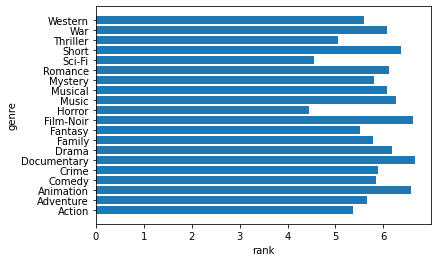

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_barchart_meanrank_genre(df):
  df = df.dropna(subset = ["rank"])
  mean_rank_genre = df.groupby('genre').mean() 
  mean_rank_genre_df = mean_rank_genre['rank']
  label = mean_rank_genre_df.keys()
  plt.barh(label, mean_rank_genre_df)
  plt.xlabel("rank")
  plt.ylabel("genre")
  plt.show()

show_barchart_meanrank_genre(cleaned_df)  

### Plot a pie chart of how many movies of each genre there are 
---


In [8]:
df.groupby(['genre'])['genre'].count()

genre
Action         12890
Adventure       8598
Animation      17038
Comedy         54667
Crime          12610
Documentary    35698
Drama          72635
Family         11074
Fantasy         4871
Film-Noir        429
Horror          7423
Music           4444
Musical         6843
Mystery         4951
Romance        13562
Sci-Fi          4957
Short          72894
Thriller       10681
War             4398
Western         8231
Name: genre, dtype: int64

In [9]:
# for i in df['genre']:
#   if i <= #df['genre'].value_counts(normalize=True)



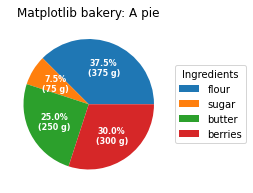

In [10]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
# print(help(fig))
recipe = ["375 g flour",
          "75 g sugar",
          "250 g butter",
          "300 g berries"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

genre
Action         12890
Adventure       6126
Animation      15924
Comedy         46812
Crime           9360
Documentary    34786
Drama          55272
Family          2317
Horror          4492
Musical         2188
Romance         2357
Short          24758
Thriller        2710
Western         5034
other           6583
Name: genre, dtype: int64


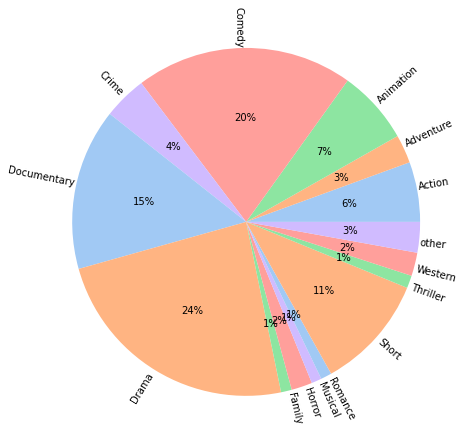

In [11]:


filt = cleaned_df['genre'].isin(['Sci-Fi','Mystery','Fantasy','Music','War','Film-Noir']) 
cleaned_df.loc[filt,'genre'] = 'other' #Access group of rows and columns by label(s) 
cleaned_df['genre'].value_counts(normalize=True) #Return a Series containing counts of unique values.
print(cleaned_df.groupby(['genre'])['genre'].count())
labels= cleaned_df.groupby(['genre'])['genre'].count().keys()
colors = sns.color_palette('pastel')[0:5]
plt.pie(cleaned_df.groupby(['genre'])['genre'].count(), labels = labels,rotatelabels=True, labeldistance=1,radius=2, autopct='%.0f%%',colors=colors)
#plt.pie(genre, labels = labels, rotatelabels=True,radius=3.4)
plt.show()

# labels= cleaned_df['genre'].value_counts(normalize=True).keys()
# plt.pie(cleaned_df['genre'].value_counts(normalize=True), labels = labels,rotatelabels=True, labeldistance=1)
# plt.show()

# def group_genres(df):
#   return df['genre'].isin(['Sci-Fi','Mystery','Fantasy','Music','War','Film-Noir']) 
  
# group_genres(cleaned_df)
# cleaned_df['others'] = cleaned_df.apply(group_genres(cleaned_df),axis=1)
# print(cleaned_df['others'])
# def show_piechart_moviecount_eachgenre(df):
#   # df['genre'].value_counts(normalize=True)
#   countmovie_pergenre =  df.groupby(['genre'])['genre'].count()
  # labels= countmovie_pergenre.keys()
  # plt.pie(countmovie_pergenre, labels = labels,rotatelabels=True, labeldistance=1.5)
  # plt.show()
  # return countmovie_pergenre

# show_piechart_moviecount_eachgenre(cleaned_df)

### Plot a graph showing the mean Rank for each year 

year
1892    3.450000
1893    6.800000
1894    6.066667
1895    5.642857
1896    4.400000
          ...   
2000    6.012256
2001    6.134462
2002    6.322129
2003    6.247705
2004    6.263153
Name: rank, Length: 113, dtype: float64


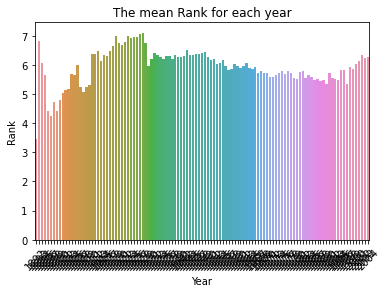

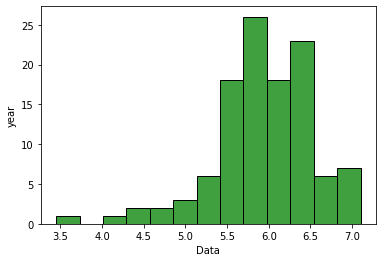

In [12]:
dorpna_df = cleaned_df.dropna(subset = ["rank"])
groupedyear_df = dorpna_df.groupby('year')
meanrank_data = dorpna_df.groupby(['year'])['rank'].mean()
print(meanrank_data)
labels = meanrank_data.keys()
#matplotlib.pyplot.figure() Function to Change the Size of a Seaborn Plot.

chart = sns.barplot(x=labels, y=meanrank_data)
#plt.xticks(rotation='vertical')
chart.set_xticklabels(labels=labels, rotation=45)
# plt.xticks(rotation=70)
# plt.tight_layout()
# chart.set_xticklabels(meanrank_data.get_xticklabels(), 
#                           rotation=90, 
#                           horizontalalignment='right')
chart.set(xlabel='Year',ylabel='Rank',title='The mean Rank for each year')
# chart.set_xlabel('Year', size=16)
# chart.set_ylabel('rank', size=16)
plt.show()

# chart.ticklabel_format()

#def show_histchart(df):
  
color = 'green'
chart = sns.histplot(data=meanrank_data,color=color)
chart.set_xlabel('Data')
chart.set_ylabel('year')
plt.show()
  
# show_histchart(meanrank_data)


### What else can you find out from this dataset?
---
Make a plan of 3 further things you can do to interrogate and analyse this dataset

Type your answer here  

1.  how many genre make each year
2.  how many films made each year
3.  how many films made by director  

### Complete the tasks you have set out in the exercise above. 
---


In [13]:
# How many genre make each year
cleaned_df.groupby(['genre','year']).count()

id  first_name  last_name  movieName  rank
genre  year                                             
Action 1900    1           1          1          1     0
       1903    2           2          2          2     2
       1908   19          19         19         19     3
       1909    3           3          3          3     0
       1911    5           5          5          5     1
...          ...         ...        ...        ...   ...
other  2002  229         229        229        229    38
       2003  252         252        252        252    38
       2004  203         203        203        203    20
       2005   32          32         32         32     0
       2006    5           5          5          5     0

[1537 rows x 5 columns]

In [14]:
# how many films made each year
cleaned_df.groupby('year').count()


,id,first_name,last_name,movieName,rank,genre
year,,,,,,
1888,2,2,2,2,0,2
1892,4,4,4,4,4,4
1893,1,1,1,1,1,1
1894,5,5,5,5,3,5
1895,36,36,36,36,28,36
...,...,...,...,...,...,...
2003,8724,8724,8724,8724,2396,8724
2004,6451,6451,6451,6451,1167,6451
2005,1200,1200,1200,1200,0,1200


In [15]:
# how many films made by director
#cleaned_df.groupby('last_name').count()
cleaned_df.groupby(['first_name','last_name'])['last_name'].count()

first_name      last_name   
'Philthy' Phil  Phillips         1
'Weird Al'      Yankovic         6
A.              Aleksandrov      1
                Babes            1
                Balakrishnan     1
                                ..
Ülo             Pikkov           1
Ümit            Utku            22
Þorvaldur       Kristinsson      1
Þráinn          Bertelsson       3
Þór Elís        Pálsson          2
Name: last_name, Length: 64270, dtype: int64

# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer:
get data info , describe data
clean data, 
import libraries
extract data , statistic data
produce charts with matplotlib or seaborn libraries.

## What caused you the most difficulty?

Your answer:to clean data probably, extract correct dataframe, 